In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv("C:/datasets/Medical_insurance_dataset.csv")
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [3]:
insurance.drop(["User ID"], axis = "columns", inplace = True)
insurance["Purchased"] = insurance["Purchased"].apply(lambda x : 1 if x == "purchased" else 0)

In [5]:
insurance.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


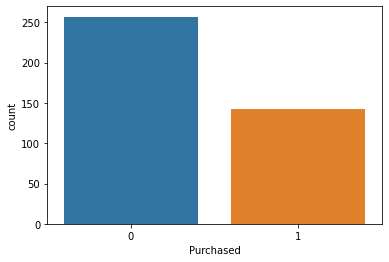

In [6]:
sns.countplot(x = "Purchased", data = insurance);

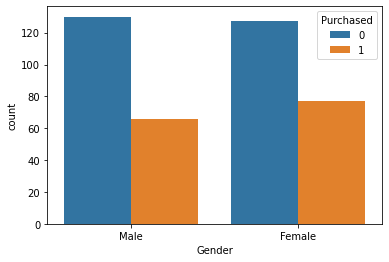

In [7]:
sns.countplot(x = "Gender", hue = "Purchased", data = insurance);

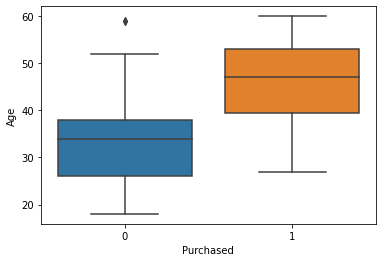

In [8]:
sns.boxplot(x = "Purchased", y = "Age", data = insurance);

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [10]:
x = insurance.drop(["Purchased"], axis = "columns")
y = insurance["Purchased"]

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [12]:
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [13]:
pd.get_dummies(insurance["Gender"])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [14]:
pd.get_dummies(x)

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [15]:
x = pd.get_dummies(x)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1234)

In [19]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression()
logisticmodel.fit(x_train, y_train)

LogisticRegression()

In [20]:
logisticmodel.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
logistic_prediction = logisticmodel.predict(x_test)

In [29]:
metrics.accuracy_score(y_test, logistic_prediction)

0.6625

In [30]:
metrics.f1_score(y_test, logistic_prediction)

0.0

In [31]:
#NAIVE BAYES MODEL

from sklearn.naive_bayes import GaussianNB

naivemodel = GaussianNB()
naivemodel.fit(x_train, y_train)

GaussianNB()

In [32]:
naivemodel_prediction = naivemodel.predict(x_test)

In [33]:
naivemodel_prediction

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [34]:
metrics.accuracy_score(y_test, naivemodel_prediction)

0.85

In [35]:
metrics.f1_score(y_test, naivemodel_prediction)

0.7692307692307692

In [36]:
#RANDOM FOREST MODEL


from sklearn.ensemble import RandomForestClassifier

randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
randomforestmodel_prediction = randomforestmodel.predict(x_test)
randomforestmodel_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [38]:
metrics.accuracy_score(y_test, randomforestmodel_prediction)

0.8375

In [39]:
metrics.f1_score(y_test, randomforestmodel_prediction)

0.7796610169491525

In [46]:
# model evaluation
algos = ["Logistic_Regression", "Naive_Bayes", "Random_Forest"]
accuracy_score = [metrics.accuracy_score(y_test, logistic_prediction), metrics.accuracy_score(y_test, naivemodel_prediction), metrics.accuracy_score(y_test, randomforestmodel_prediction)]
F1_score = [metrics.f1_score(y_test, logistic_prediction), metrics.f1_score(y_test, naivemodel_prediction),metrics.f1_score(y_test, randomforestmodel_prediction)]

model_evaluation = pd.DataFrame({"MODEL": algos, "ACCURACY SCORE":accuracy_score, "F1_SCORE":F1_score})

In [47]:
model_evaluation

,MODEL,ACCURACY SCORE,F1_SCORE
0,Logistic_Regression,0.6625,0.000000
1,Naive_Bayes,0.8500,0.769231
2,Random_Forest,0.8375,0.779661
